In [1]:
import math
import random
import numpy as np
import pandas as pd

from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

# Chapter 5: Foundations for inference

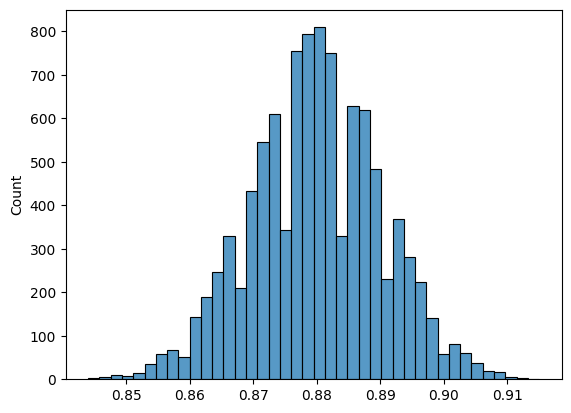

In [2]:
sample_dist = []
for i in range(10000):
    sample = [1 if random.random() <= 0.88 else 0 for i in range(1000)]
    proportion = sum(sample) / 1000
    sample_dist.append(proportion)

sns.histplot(
    data= sample_dist,
    bins= 40
);

In [3]:
norm.cdf(0.90, loc= 0.88, scale= 0.01) - norm.cdf(0.86, loc= 0.88, scale= 0.01)

0.9544997361036418

In [4]:
n = 1000
p = 0.88

sufficient_sample_size = (n * p) >= 10 and (n * (1-p)) >= 10
print(sufficient_sample_size)

mu_p = p

SE_p = math.sqrt((p * (1-p)) / n)

print(mu_p, SE_p)

True
0.88 0.010276186062932104


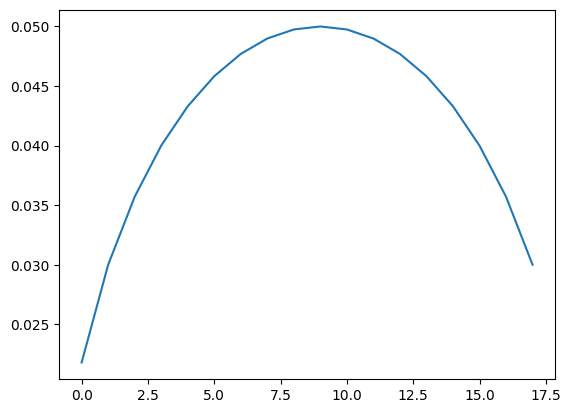

In [5]:
def testing_standard_error(p):
    return math.sqrt((p * (1-p))/100)

x = [testing_standard_error(p) for p in np.arange(0.05, 0.95, 0.05)]

plt.plot(x);

In [6]:
def standard_error(p, n):
    return math.sqrt((p * (1-p)) / n)

def z_star(interval):
    return -norm.ppf((1-interval)/2)

def margin_of_error(p, n, interval):
    return z_star(interval) * standard_error(p, n)


def confidence_interval(p:float, n:int, interval: float):
    lower_bound = p - margin_of_error(p, n, interval)
    upper_bound = p + margin_of_error(p, n, interval)

    return lower_bound, upper_bound

print([confidence_interval(0.887, 1000, 0.90)])

[(0.8705324766298196, 0.9034675233701804)]


In [7]:
print(z_star(0.90))
print(standard_error(0.887, 1000))

1.6448536269514729
0.010011543337567888


In [8]:
print(standard_error(0.82, 1042))

0.011901708775845125


In [9]:
print([confidence_interval(0.82, 1042, 0.95)])

[(0.7966730794448592, 0.8433269205551407)]


In [10]:
print([confidence_interval(0.848, 1000, 0.99)])

[(0.818755998353761, 0.877244001646239)]


In [11]:
print(confidence_interval(0.24, 50, 0.95))

(0.12162077134103225, 0.35837922865896776)


In [12]:
norm.cdf(0.37, loc= 0.5, scale= 0.016)

2.236812064444105e-16

In [13]:
SE = standard_error(0.5, 1028)
norm.cdf(0.56, loc= 0.5, scale= SE)

0.9999403335816893

# Chapter 6: Inference for Categorical Data

In [14]:
standard_error(0.7, 826)

0.015944820103582016

In [15]:
print(confidence_interval(0.7, 826, 0.95))

(0.668748726857009, 0.7312512731429909)


In [16]:
p_hat = 0.51
sample_size = 826
SE = standard_error(p_hat, sample_size)

z_score = (0.51 - 0.50) / SE

print(norm.sf(z_score)*2)

0.565345869781388


In [17]:
def sample_size_from_moe(moe:float, p:float, confidence:float):
    return (p * (1-p)) / (moe / z_star(confidence))**2

In [18]:
sample_size_from_moe(0.04, 0.5, 0.95)

600.227940733457

In [19]:
print(sample_size_from_moe(0.01, 0.017, 0.9))
print(sample_size_from_moe(0.01, 0.062, 0.9))
print(sample_size_from_moe(0.01, 0.013, 0.9))

452.1233666138848
1573.4358511637295
347.1482805949826


In [20]:
print(sample_size_from_moe(0.05, 0.7, 0.95))

322.6825409383065


In [22]:
fish_oil_heart_attack = 145
fish_oil_no_event = 12788
placebo_heart_attack = 200
placebo_no_event = 12738

treatment_total = fish_oil_heart_attack + fish_oil_no_event
placebo_total = placebo_heart_attack + placebo_no_event

p_treatment = fish_oil_heart_attack / treatment_total
p_control = placebo_heart_attack / placebo_total

point_estimate = p_treatment - p_control

SE = math.sqrt(
    (
        p_treatment * (1-p_treatment) /
        treatment_total
    )
    +
    (
        p_control * (1-p_control) /
        placebo_total
    )
)

upper_bound = point_estimate + (z_star(0.95) * SE)
lower_bound = point_estimate - (z_star(0.95) * SE)

print(point_estimate)
print(SE)
print(lower_bound, upper_bound)

-0.004246710608608092
0.0014260130479947562
-0.007041644824162001 -0.0014517763930541822


# Chapter 7: Inference for Numerical Data